# Preprocessing and scaling
Follow _Introduction to Machine Learning_  
- [Chapter 3](https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb) Section 3.3 Preprocessing and Scaling


Some algorithms are sensitive to the scaling of numerical features:
- PCA
- SVM
- Neural networks
- Regularized models

Preprocessing is used to bring numerical features to a similar scale.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import mglearn

### Different scalers 

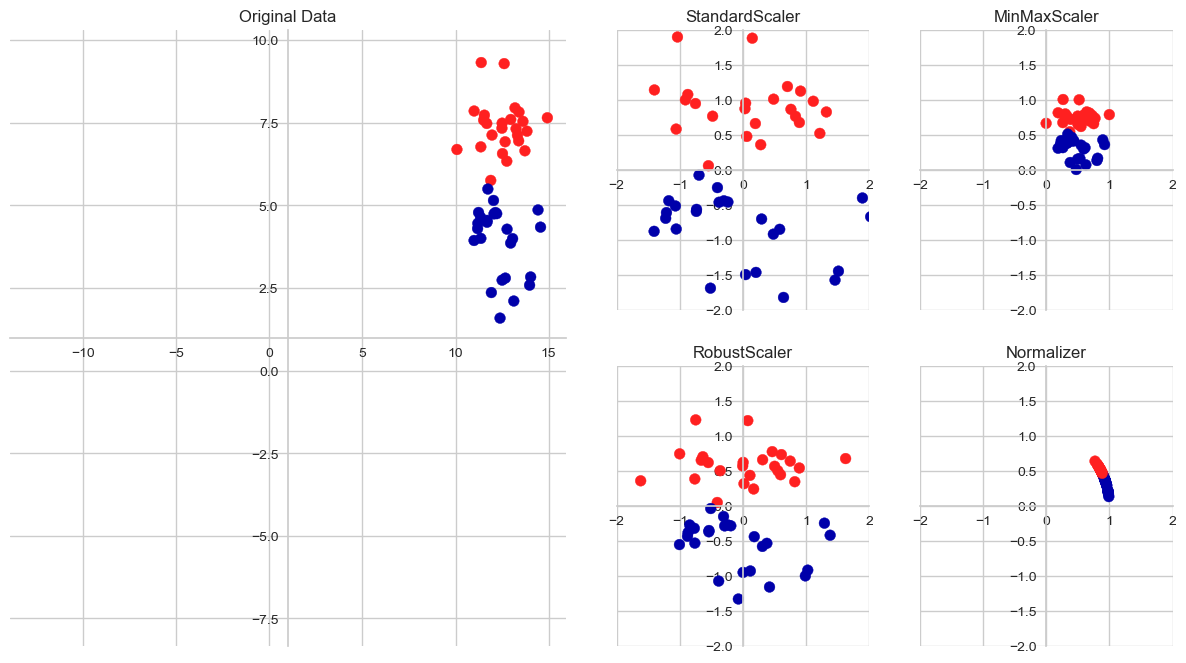

In [27]:
mglearn.plots.plot_scaling()

1. StandardScaler: Mean of zero, variance of one
2. MinMaxScaler: Minimum of zero, maximum of one
3. RobustScaler: Median of zero, interquartile range of one
4. Normalizer: Each sample (row) has unit norm.



In [28]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

# original row [4, 1, 2, 2]
# transformed row has length 1
row = np.array([0.8, 0.2, 0.4, 0.4])
np.sqrt(np.sum(row**2))

1.0

### Applying data transformations

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_val, y_train, y_val = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_val.shape)

(426, 30)
(143, 30)


**Using a minmax scaler**

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [31]:
scaler.fit(X_train)

MinMaxScaler()

In [32]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


**Transform the validation data with the _trained_ scaler**

In [33]:
# transform validation data
X_val_scaled = scaler.transform(X_val)
# print validation data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_val_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_val_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### Important: Scalers are learned - do not call fit with validation/test data

Else the data is changed.

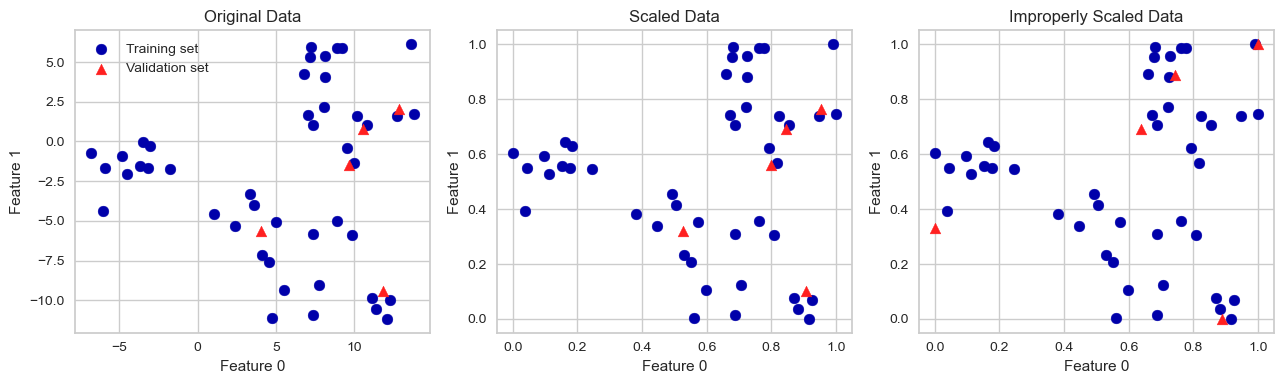

In [34]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and Validation sets
X_train, X_val = train_test_split(X, random_state=5, test_size=.1)

# plot the training and Validation sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                color=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_val[:, 0], X_val[:, 1], marker='^',
                color=mglearn.cm2(1), label="Validation set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                color=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_val_scaled[:, 0], X_val_scaled[:, 1], marker='^',
                color=mglearn.cm2(1), label="Validation set", s=60)
axes[1].set_title("Scaled Data")

# rescale the Validation set separately
# so Validation set min is 0 and Validation set max is 1
# DO NOT DO THIS! For illustration purposes only.
val_scaler = MinMaxScaler()
val_scaler.fit(X_val)
X_val_scaled_badly = val_scaler.transform(X_val)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                color=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_val_scaled_badly[:, 0], X_val_scaled_badly[:, 1],
                marker='^', color=mglearn.cm2(1), label="Validation set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

### Side note: `fit_transform()` for efficiency

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

### Effect of scaling on supervised learning

**Without feature scaling**

In [36]:
from sklearn.svm import SVC

X_train, X_val, y_train, y_val = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Validation set accuracy: {:.2f}".format(svm.score(X_val, y_val)))

Validation set accuracy: 0.94


**With MinMax feature scaling**

In [37]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled Validation set
print("Scaled Validation set accuracy: {:.2f}".format(
    svm.score(X_val_scaled, y_val)))

Scaled Validation set accuracy: 0.97


**With Standard feature scaling**

In [38]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled Validation set
print("SVM validation accuracy: {:.2f}".format(svm.score(X_val_scaled, y_val)))

SVM validation accuracy: 0.96


## Excercise: apply feature scaling to energy dataset 

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def get_regressor_mse(model, X, y, scaler):
    '''Calculate train and validation mean-squared error (mse) of regressor (model)
        
        Splits feature matrix X and target vector y 
        with sklearn train_test_split() and random_state=956.
        
        Applies a sklearn scaler
        
        model (sklearn regressor): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: training mse, validation mse
    
    '''
    # Split first
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=956)
    
    # TODO: Learn scaler on training set
    
    X_train_scaled = scaler.fit(X_train).transform(X_train)
    
    # TODO: Transform validation set with learned scaler
    scaler.fit(X_val)
    X_val_scaled = scaler.transform(X_val)
    
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)

    return mean_squared_error(y_train, y_train_pred), mean_squared_error(y_val, y_val_pred)

In [40]:
from yellowbrick.datasets import load_energy

X, y = load_energy()
print('X.shape={}, type(X)={}'.format(X.shape, type(X)))
print('y.shape={}, type(y)={}'.format(y.shape, type(y)))

X.shape=(768, 8), type(X)=<class 'pandas.core.frame.DataFrame'>
y.shape=(768,), type(y)=<class 'pandas.core.series.Series'>


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

models = [LinearRegression(), RandomForestRegressor(random_state=88), SVC(C=100)]
scalers = [ MinMaxScaler(), StandardScaler()]
# TODO: add a list of scalers to iterate
X, y = load_energy()

# Iterate all models
for model in models:
    # Iterate all scalers
    for scaler in scalers:
        train, val = get_regressor_mse(model, X, y, scaler)
        print("{} - {}, train_score={:.1f}, validation_score={:.1f}".format(model.__class__.__name__,
                                                                            scaler.__class__.__name__,
                                                                                    train,
                                                                                    val))


LinearRegression - MinMaxScaler, train_score=8.0, validation_score=10.3
LinearRegression - StandardScaler, train_score=8.0, validation_score=2765132554536245805449216.0
RandomForestRegressor - MinMaxScaler, train_score=0.0, validation_score=0.2
RandomForestRegressor - StandardScaler, train_score=0.0, validation_score=0.2


Scaling does not seem to make a difference